In [1]:
import pandas as pd
import pandas_ta as ta
from dateutil import parser
from datetime import datetime, timedelta, timezone, tzinfo
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [2]:
stock_data = pd.read_csv('./4816.T.csv')
topix = pd.read_csv('./1308.T.csv')
nikkei = pd.read_csv('./^N225.csv')
# stock_data.plot(y=["Adj Close", "High", "Low"])
# topix.plot(y=["Adj Close", "High", "Low"])
# nikkei.plot(y=["Adj Close", "High", "Low"])

common_dates = set(topix["Date"]) & set(nikkei["Date"])

stock_data.head()
stock_data.index = pd.to_datetime(stock_data["Date"], format='%Y-%m-%d')


In [3]:
def runAllStrategy(df):
    indicators="""ao
    apo
    bias
    bop
    brar
    cci
    cfo
    cg
    cmo
    coppock
    cti
    dm
    er
    eri
    fisher
    inertia
    kdj
    kst
    macd
    mom
    pgo
    ppo
    psl
    pvo
    qqe
    roc
    rsi
    rsx
    rvgi
    stc
    slope
    smi
    squeeze
    squeeze_pro
    stoch
    stochrsi
    trix
    tsi
    uo
    willr"""
    CustomStrategy = ta.Strategy(
        name="Momentums",
        description="Bunch of different momentum measurements",
        ta=[
            {"kind": ind} for ind in indicators.split()
        ]
    )
    df.ta.strategy(CustomStrategy)
    df= df[-1500:]
    df.dropna(axis=1, inplace=True, how='any')
    return df

stock_data = runAllStrategy(stock_data)
stock_data
# runAllStrategy(topix)
# runAllStrategy(nikkei)
# topix.set_index("Date", inplace=True)
# nikkei.set_index("Date", inplace=True)
# stock_data.plot(y=["Adj Close", "AO_5_34"])
# stock_data.plot(y=["BIAS_SMA_26"])

C:\Users\anjur\AppData\Local\Temp\ipykernel_30464\26943580.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True, how='any')


,Date,Open,High,Low,Close,Adj Close,Volume,AO_5_34,APO_12_26,BIAS_SMA_26,...,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,TRIX_30_9,TRIXs_30_9,TSI_13_25_13,TSIs_13_25_13,UO_7_14_28,WILLR_14
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-20,2016-07-20,1621.666626,1640.000000,1616.666626,1640.000000,1485.850708,10200,-50.710787,-23.183767,-0.025817,...,15.116916,20.605052,19.261423,17.065348,0.045503,0.065417,-11.265716,-4.914950,39.684737,-78.947394
2016-07-21,2016-07-21,1631.666626,1631.666626,1593.333374,1605.000000,1454.140381,25800,-57.107854,-27.403856,-0.043877,...,10.546214,13.257805,11.234072,14.680934,0.039190,0.060640,-13.450593,-6.134328,35.989220,-92.045480
2016-07-22,2016-07-22,1608.333374,1628.333374,1603.333374,1603.333374,1452.630615,11700,-62.828434,-28.728638,-0.042456,...,12.049994,12.571041,11.234072,13.909855,0.032403,0.055465,-15.278373,-7.440620,33.454195,-92.857143
2016-07-25,2016-07-25,1633.333374,1635.000000,1600.000000,1600.000000,1449.610474,22200,-67.588235,-31.784191,-0.043018,...,6.937210,9.844473,0.387212,7.618452,0.025249,0.049908,-16.924454,-8.795453,29.149330,-94.285747
2016-07-26,2016-07-26,1631.666626,1665.000000,1616.666626,1663.333374,1506.990845,32700,-62.171575,-32.916667,-0.004985,...,26.866366,15.284524,33.333333,14.984872,0.018887,0.044120,-14.131978,-9.557814,44.497346,-32.258011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-03,2022-08-03,12170.000000,12170.000000,11840.000000,12050.000000,12050.000000,96700,401.176471,294.423077,0.064669,...,89.079365,76.280171,93.729943,72.312357,-0.008522,-0.005313,6.318919,-0.555737,61.425563,-12.000000
2022-08-04,2022-08-04,12250.000000,12640.000000,12100.000000,12540.000000,12540.000000,89200,511.941176,356.666667,0.102902,...,89.101721,82.785986,97.460888,84.660534,-0.004555,-0.006455,9.745611,0.915884,62.240653,-4.694836
2022-08-05,2022-08-05,12650.000000,12780.000000,12350.000000,12500.000000,12500.000000,86000,804.676471,397.307692,0.093834,...,90.323454,89.501514,98.501038,96.563956,0.001086,-0.006447,12.208977,2.529183,59.527546,-12.334802


In [33]:
def normalize_col(arr, col):
    mx, mn = np.max(arr), np.min(arr)
    norm = [-21]
    if mx - mn > 20:
        print(col, "norm diff", arr[:5])
        for i in range(1, len(arr)):
            if arr[i]>arr[i-1]:
                norm.append(1)
            elif arr[i]<arr[i-1]:
                norm.append(-1)
            else:
                norm.append(0)
    elif mn >=0:
        print(col, "norm 0 -> 1 snap", arr[:5])
        for i in range(1, len(arr)):
            if arr[i] > 0:
                norm.append(1)
            else:
                norm.append(-1)
    else:
        print(col, "norm -1 -> 1 snap", arr[:5])
        for i in range(1, len(arr)):
            if arr[i] > 0:
                norm.append(1)
            elif arr[i] < 0:
                norm.append(-1)
            else:
                norm.append(0)
    return np.array(norm)
columns = stock_data.columns
for col in columns[7:]:
    stock_data[col] = normalize_col(stock_data[col].to_numpy(), col)

stock_data = stock_data[1:]

AO_5_34 norm diff [-50.71078742 -57.10785378 -62.82843448 -67.58823494 -62.17157521]
APO_12_26 norm diff [-23.18376668 -27.40385554 -28.72863847 -31.78419064 -32.91666745]
BIAS_SMA_26 norm -1 -> 1 snap [-0.02581677 -0.04387674 -0.04245624 -0.04301818 -0.00498503]
BOP norm -1 -> 1 snap [ 0.78571466 -0.69565259 -0.2        -0.95238211  0.65517355]
AR_26 norm diff [52.81174854 49.03847592 48.67470436 49.15253636 49.28228785]
BR_26 norm diff [73.94739858 71.24355215 77.35852258 89.21285337 96.75517594]
CCI_14_0.015 norm diff [-108.65744112 -167.2243244  -146.26054576 -117.91130336   12.50382848]
CFO_9 norm diff [ 0.32972167 -1.10303258 -0.43889733 -0.02777761  2.83901243]
CG_10 norm -1 -> 1 snap [-5.52015318 -5.52938205 -5.530942   -5.53599838 -5.51993067]
CMO_14 norm diff [-14.36079049 -24.94160712 -25.4141679  -26.4120873    0.75686382]
COPC_11_14_10 norm diff [-6.55720081 -7.59406165 -8.39967352 -9.17120663 -7.78074342]
CTI_12 norm -1 -> 1 snap [-0.79888435 -0.80669875 -0.85034745 -0.88

C:\Users\anjur\AppData\Local\Temp\ipykernel_24148\979070675.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data[col] = normalize_col(stock_data[col].to_numpy(), col)


Prediction Accuracy
[(0.038, 'PVOs_12_26_9'), (0.038, 'PGO_14'), (0.026, 'MACDs_12_26_9'), (0.024, 'FISHERT_9_1'), (0.022, 'CTI_12'), (0.014, 'TSI_13_25_13'), (0.012, 'BIAS_SMA_26'), (0.009596928982725527, 'QQE_14_5_4.236'), (0.008, 'TRIX_30_9'), (0.008, 'RSX_14'), (0.008, 'PPO_12_26_9'), (0.004, 'SMI_5_20_5'), (-0.003003003003003003, 'APO_12_26'), (-0.0036275695284159614, 'STC_10_12_26_0.5'), (-0.0036991368680641184, 'STCstoch_10_12_26_0.5'), (-0.006, 'TRIXs_30_9'), (-0.006, 'FISHERTs_9_1'), (-0.008, 'SMIs_5_20_5')]
['PVOs_12_26_9', 'PGO_14', 'MACDs_12_26_9', 'FISHERT_9_1', 'CTI_12', 'TSI_13_25_13', 'BIAS_SMA_26', 'QQE_14_5_4.236', 'TRIX_30_9', 'RSX_14', 'PPO_12_26_9', 'SMI_5_20_5', 'APO_12_26', 'STC_10_12_26_0.5', 'STCstoch_10_12_26_0.5', 'TRIXs_30_9', 'FISHERTs_9_1', 'SMIs_5_20_5'] 18


In [106]:
# data = []

# for index, row in stock_data.iterrows():
#     date = row["Date"]
#     try:
#         top = topix.loc[date]
#         nik = nikkei.loc[date]
#         bar = []
#         for col in all_columns:
#             arr = col.split(" ")
#             name, colName = arr[0], arr[1]
#             if len(arr) == 3:
#                 colName = arr[1] + " " + arr[2]
#             cur = None
#             if name == "Toei":
#                 cur = row
#             elif name == "Nikkei":
#                 cur = nik
#             elif name == "Topix":
#                 cur = top

#             if colName == "Date":
#                 continue

#             bar.append(cur[colName])
#         data.append(bar)
#     except:
#         pass
# #         data.append([row["Date"], row["Volume"]/1000,
# #                      row["Adj Close"],
# #                      row["Low"]/row["Close"], 
# #                      row["High"]/row["Close"], 
                     
# #                      top["Adj Close"],
# #                      top["Low"]/top["Close"], 
# #                      top["High"]/top["Close"], 
                     
# #                      nik["Adj Close"],
# #                      nik["Low"]/nik["Close"],
# #                      nik["High"]/nik["Close"],
# #                     ])

# print(len(data))

3569


In [44]:
df = stock_data 
# df.set_index("Date", inplace=True)
df = df.loc[:, (df != 0).any(axis=0)]

In [45]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,AO_5_34,APO_12_26,BIAS_SMA_26,...,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,TRIX_30_9,TRIXs_30_9,TSI_13_25_13,TSIs_13_25_13,UO_7_14_28,WILLR_14
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-21,2016-07-21,1631.666626,1631.666626,1593.333374,1605.000000,1454.140381,25800,-1,-1,-1,...,-1,-1,-1,-1,1,1,-1,-1,-1,-1
2016-07-22,2016-07-22,1608.333374,1628.333374,1603.333374,1603.333374,1452.630615,11700,-1,-1,-1,...,1,-1,0,-1,1,1,-1,-1,-1,-1
2016-07-25,2016-07-25,1633.333374,1635.000000,1600.000000,1600.000000,1449.610474,22200,-1,-1,-1,...,-1,-1,-1,-1,1,1,-1,-1,-1,-1
2016-07-26,2016-07-26,1631.666626,1665.000000,1616.666626,1663.333374,1506.990845,32700,1,-1,-1,...,1,1,1,1,1,1,1,-1,1,1
2016-07-27,2016-07-27,1670.000000,1710.000000,1670.000000,1706.666626,1546.251099,30900,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-03,2022-08-03,12170.000000,12170.000000,11840.000000,12050.000000,12050.000000,96700,1,1,1,...,1,1,1,1,-1,-1,1,1,1,1
2022-08-04,2022-08-04,12250.000000,12640.000000,12100.000000,12540.000000,12540.000000,89200,1,1,1,...,1,1,1,1,-1,-1,1,1,1,1
2022-08-05,2022-08-05,12650.000000,12780.000000,12350.000000,12500.000000,12500.000000,86000,1,1,1,...,1,1,1,1,1,-1,1,1,-1,-1


In [46]:
returns_df = df.pct_change().shift(-1)[:-1]
returns_df = returns_df.clip(lower=-0.1, upper=0.1)
df["Toei Adj Close"] = returns_df["Toei Adj Close"]
df["Topix Adj Close"] = returns_df["Topix Adj Close"]
df["Nikkei Adj Close"] = returns_df["Nikkei Adj Close"]
df["Toei Volume"]/=1000
df["Topix Volume"]/=1000
df["Nikkei Volume"]/=1000


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [47]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,AO_5_34,APO_12_26,BIAS_SMA_26,...,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,TRIX_30_9,TRIXs_30_9,TSI_13_25_13,TSIs_13_25_13,UO_7_14_28,WILLR_14
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-03,2022-08-03,12170.0,12170.0,11840.0,12050.0,12050.0,96700,1,1,1,...,1,1,1,1,-1,-1,1,1,1,1
2022-08-04,2022-08-04,12250.0,12640.0,12100.0,12540.0,12540.0,89200,1,1,1,...,1,1,1,1,-1,-1,1,1,1,1
2022-08-05,2022-08-05,12650.0,12780.0,12350.0,12500.0,12500.0,86000,1,1,1,...,1,1,1,1,1,-1,1,1,-1,-1
2022-08-08,2022-08-08,12350.0,12470.0,12060.0,12320.0,12320.0,122900,1,1,1,...,-1,-1,-1,-1,1,-1,1,1,1,-1
2022-08-09,2022-08-09,12380.0,12740.0,12320.0,12690.0,12690.0,91200,1,-1,1,...,1,-1,0,-1,1,-1,1,1,1,1


In [48]:
df = df[df.notna().all(axis=1)]

In [49]:
df.to_csv("processed_data.csv", index=False)

<AxesSubplot:xlabel='Date'>

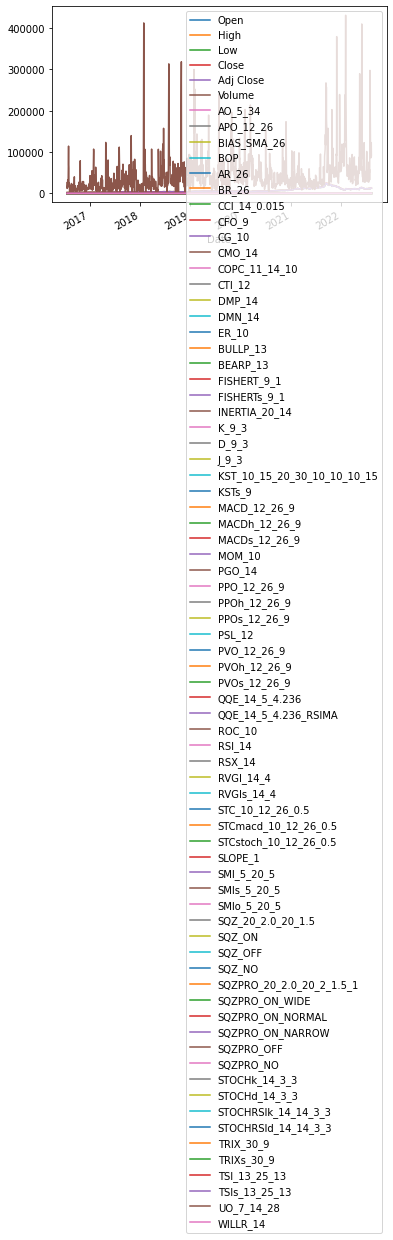

In [50]:
df.plot()